<a href="https://colab.research.google.com/github/SushantNiraula/DeepLearning-with-PyTorch/blob/main/PyTorch_Classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
## Make a classification data and get it ready

In [89]:
from sklearn.datasets import make_circles

In [90]:
# Make 1000 samples
n_samples =1000

# Create circles
X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

len(X),len(y)

(1000, 1000)

In [91]:
print(f'First 5 samples: \n{X[:5]}') ## Two features per sample
print(f'First 5 targets: \n{y[:5]}') ## Only 2 classes so our problem will become BinaryClass Classification.

First 5 samples: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 targets: 
[1 1 1 1 0]


In [92]:
import pandas as pd
circles= pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"target":y})
circles.head()

,X1,X2,target
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


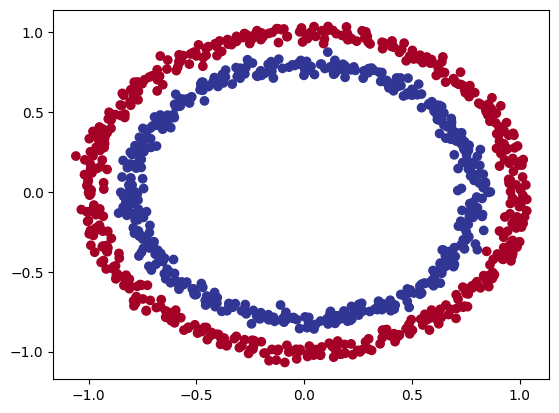

In [93]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [94]:
## Turning our Data into Tensors as Pytorch expects data to be tensors.
## Before that first let's see what datatype our data currently is .
print(type(X))

<class 'numpy.ndarray'>


## Currently our data is numpy array. So we know how to convert numpy array into a Tensor.

In [95]:
import torch
from torch import nn

In [96]:
X= torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [97]:
X.shape,y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [98]:
X[:20]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967],
        [-0.4796,  0.6764],
        [-0.0136,  0.8033],
        [ 0.7715,  0.1478],
        [-0.1693, -0.7935],
        [-0.1215,  1.0215],
        [-0.6425, -0.5441],
        [ 0.5695,  0.8448],
        [-0.1177,  0.8314],
        [ 0.7341, -0.3332],
        [ 0.6008, -0.5874],
        [ 0.1902, -0.7634],
        [-0.9370, -0.3434],
        [ 0.1071, -0.7931],
        [-0.8189, -0.1016],
        [-0.6421, -0.7454]])

In [99]:
## split data into training and test set.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [100]:
len(X_train),len(X_test)

(800, 200)

In [101]:
n_samples

1000

## 2. Build a model
Let's build a model to classifify our blue and red dots.

To do so, we want to :
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one.
2. Construct a model (by subclassing `nn.Module`)
3. Define loss functiona and Optimizer.
4. Create a training and test loop.


In [102]:
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'

In [103]:
device

'cpu'

In [104]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [105]:
X_train.device

device(type='cpu')

In [106]:
X_train.shape

torch.Size([800, 2])

## Now we've setup device agnostic code, let's create a model that:
1. subclass `nn.Module` (almost all models in PyTorch subclas `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of our model.
4. Instiate an instance of our model class and send it to the target device.

In [107]:
## 1. Construct  a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling the shapes of our data.
    self.layer_1= nn.Linear(in_features=2, out_features=5) ## Model hidden features more our model can learn the pattern's on.
    self.layer_2= nn.Linear(in_features= 5, out_features=1)

    self.two_linear_layers= nn.Sequential(
        self.layer_1,
        self.layer_2
    )

  ## 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.two_linear_layers(x)
    # return self.layer_2(self.layer_1(x)) ## x -> layer_1 -> layer_2 -> output

  #4. Instantiate an instance of our model class and send it to the target device.

model_0 =CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [108]:
device

'cpu'

In [109]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060])),
             ('two_linear_layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('two_linear_layers.0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('two_linear_layers.1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('two_linear_

In [110]:
next(model_0.parameters()).device

device(type='cpu')

In [111]:
## Let's replicate the model above using nn.Sequential

model_0= nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [112]:
## Make Predictions
with torch.inference_mode():
  untrained_preds= model_0(X_test.to(device))
print(f"Length of predictions :{len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f'Length of test Samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 10 predictions:\n{untrained_preds[:10]}')
print(f'\nFirst 10 Labels:\n{y_test[:10]}')

Length of predictions :200, shape: torch.Size([200, 1])
Length of test Samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])

First 10 Labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [113]:
## Setup loss function and optimizer.

loss_fn= nn.BCEWithLogitsLoss() ## BCEWithLogitsLoss has sigmoid activation function buit on.
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [114]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [115]:
## Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc=(correct/len(y_pred)) *100
  return acc

In [116]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the no of epochs
epochs=1000

# put data to target device
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)

## Build training and evaluation loop
for epoch in range(epochs):
  model_0.train()

  # 1. Forward Pass
  y_logits= model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #3 turn logits-> pred probs -> pred labels.

  #2. Calculate loss/accuracy
  loss= loss_fn(y_logits, y_train)
  acc=accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # 3. Backward pass
  loss.backward()


  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits= model_0(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    # calculate test loss/acc
    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69796 | Acc: 51.88% | Test Loss: 0.69440 | Test Acc: 58.00%
Epoch: 10 | Loss: 0.69590 | Acc: 51.25% | Test Loss: 0.69305 | Test Acc: 53.00%
Epoch: 20 | Loss: 0.69490 | Acc: 51.62% | Test Loss: 0.69254 | Test Acc: 49.50%
Epoch: 30 | Loss: 0.69435 | Acc: 51.12% | Test Loss: 0.69236 | Test Acc: 49.50%
Epoch: 40 | Loss: 0.69401 | Acc: 50.88% | Test Loss: 0.69232 | Test Acc: 51.00%
Epoch: 50 | Loss: 0.69378 | Acc: 50.25% | Test Loss: 0.69234 | Test Acc: 50.00%
Epoch: 60 | Loss: 0.69362 | Acc: 50.00% | Test Loss: 0.69239 | Test Acc: 51.50%
Epoch: 70 | Loss: 0.69351 | Acc: 50.25% | Test Loss: 0.69246 | Test Acc: 51.00%
Epoch: 80 | Loss: 0.69342 | Acc: 49.88% | Test Loss: 0.69254 | Test Acc: 50.00%
Epoch: 90 | Loss: 0.69336 | Acc: 49.88% | Test Loss: 0.69262 | Test Acc: 53.00%
Epoch: 100 | Loss: 0.69331 | Acc: 49.25% | Test Loss: 0.69271 | Test Acc: 53.00%
Epoch: 110 | Loss: 0.69327 | Acc: 49.75% | Test Loss: 0.69279 | Test Acc: 54.00%
Epoch: 120 | Loss: 0.69324 | Acc: 50.25

In [117]:
# 4. Make predictions  and evaluate the model.
## From the metrics it looks like our model isn't Learning anything..
## So to instpect it let's make some predictions and make them visual.


In [118]:
import requests
from pathlib import Path
# Download helper functions from learn PyTorch repo (if it's not already downloaded.)
if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


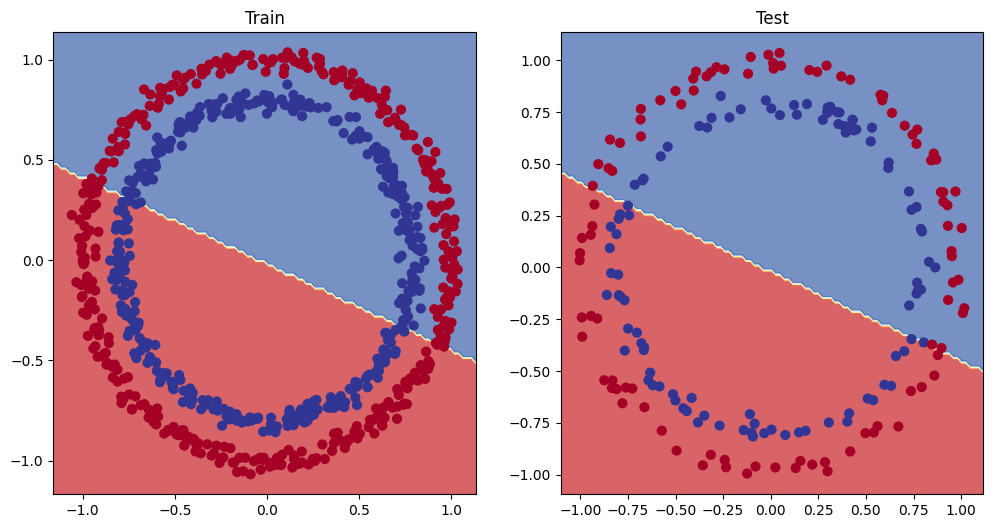

In [119]:
## Plot Decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


In [120]:
## improving a model (from a model Perspective)
# 1. Add more layers - give the model more chance to learn about patterns in the data.
## 2. Add more hidden units.- go from 5 hidden units to ten hidden units.
# Fit for longer.
# Changing the activation functions.
# Fix the learning rate.

In [121]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    x = self.layer_1(x)
    x = self.layer_2(x)
    x = self.layer_3(x)
    return x





In [122]:
model_1=CircleModelV1()
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [123]:
# Create a loss Function
loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [124]:
type(X_train)

torch.Tensor

In [125]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the no of epochs
epochs=1000

# put data to target device
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)

## Build training and evaluation loop
for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_logits= model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #3 turn logits-> pred probs -> pred labels.

  #2. Calculate loss/accuracy
  loss= loss_fn(y_logits, y_train)
  acc=accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # 3. Backward pass
  loss.backward()


  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits= model_1(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    # calculate test loss/acc
    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 10 | Loss: 0.69369 | Acc: 50.25% | Test Loss: 0.69270 | Test Acc: 50.00%
Epoch: 20 | Loss: 0.69351 | Acc: 50.12% | Test Loss: 0.69283 | Test Acc: 49.50%
Epoch: 30 | Loss: 0.69339 | Acc: 50.50% | Test Loss: 0.69297 | Test Acc: 48.00%
Epoch: 40 | Loss: 0.69329 | Acc: 50.38% | Test Loss: 0.69310 | Test Acc: 49.00%
Epoch: 50 | Loss: 0.69322 | Acc: 49.88% | Test Loss: 0.69324 | Test Acc: 50.00%
Epoch: 60 | Loss: 0.69317 | Acc: 49.38% | Test Loss: 0.69336 | Test Acc: 51.50%
Epoch: 70 | Loss: 0.69312 | Acc: 49.38% | Test Loss: 0.69348 | Test Acc: 50.50%
Epoch: 80 | Loss: 0.69309 | Acc: 50.12% | Test Loss: 0.69359 | Test Acc: 50.00%
Epoch: 90 | Loss: 0.69307 | Acc: 50.50% | Test Loss: 0.69370 | Test Acc: 48.50%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test Loss: 0.69379 | Test Acc: 48.00%
Epoch: 110 | Loss: 0.69303 | Acc: 50.88% | Test Loss: 0.69388 | Test Acc: 46.50%
Epoch: 120 | Loss: 0.69302 | Acc: 50.75

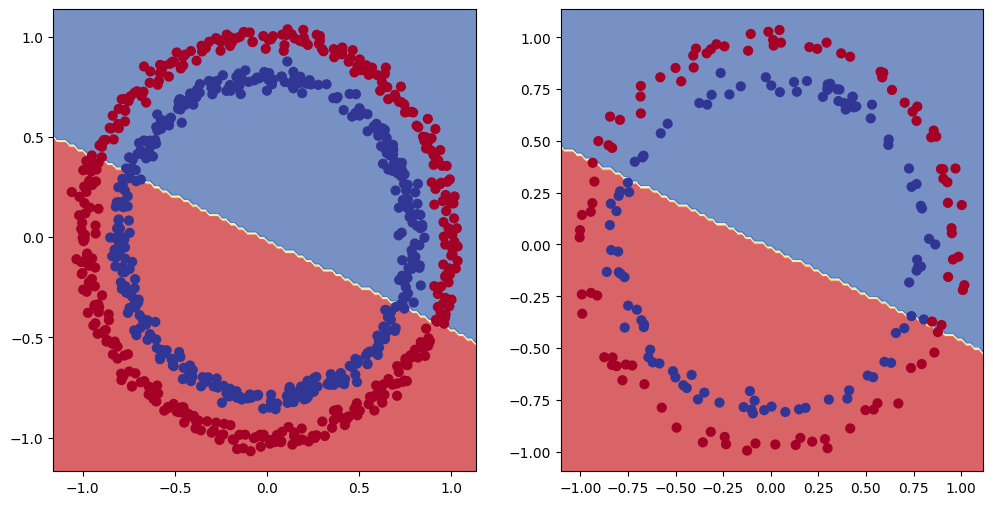

In [126]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_1, X_test, y_test)


In [127]:
## Let's check on linear data set to see if it fit's it.
X=torch.arange(-5,5,0.2).unsqueeze(dim=1)
weight=1.9
bias=8.0
y=weight * X + bias
print(X[:10],y[:10])


tensor([[-5.0000],
        [-4.8000],
        [-4.6000],
        [-4.4000],
        [-4.2000],
        [-4.0000],
        [-3.8000],
        [-3.6000],
        [-3.4000],
        [-3.2000]]) tensor([[-1.5000],
        [-1.1200],
        [-0.7400],
        [-0.3600],
        [ 0.0200],
        [ 0.4000],
        [ 0.7800],
        [ 1.1600],
        [ 1.5400],
        [ 1.9200]])


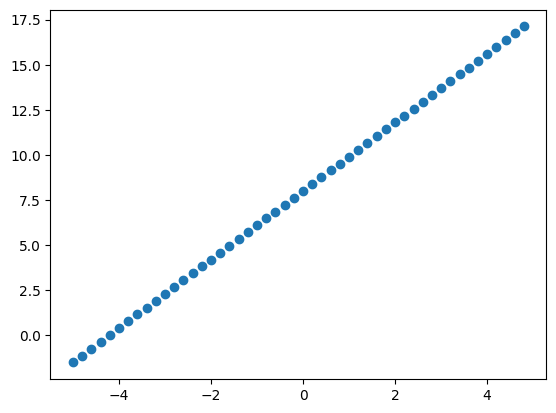

In [128]:
plt.scatter(X,y)

In [129]:
train_split=int(0.8 *len(X))
X_train_regression,y_train_regression=X[:train_split],y[:train_split]
X_test_regression,y_test_regression=X[train_split:],y[train_split:]
X_train_regression.shape, X_test_regression.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

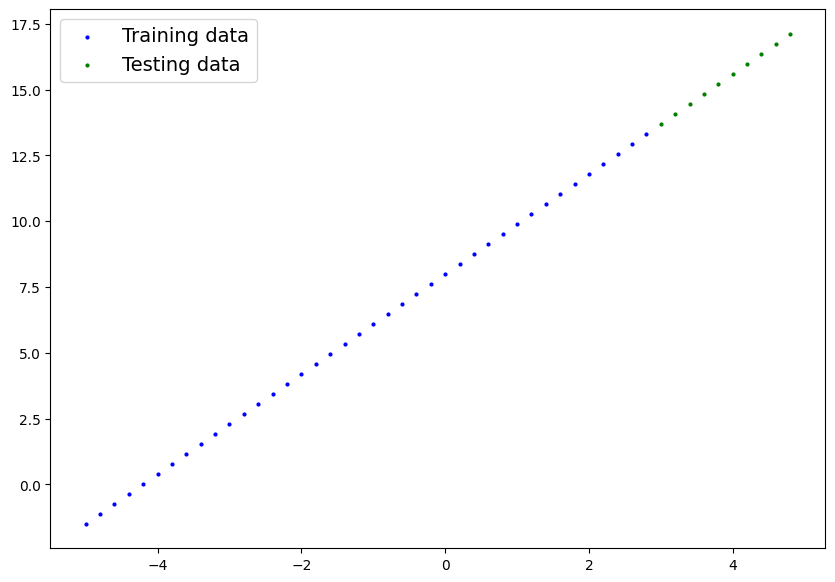

In [130]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)

In [131]:
## Adjusting Model 1 to fit a straight line

model_2=nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [132]:
loss_fn= nn.L1Loss()
optimizer= torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)


In [133]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

X_train_regression, y_train_regression= X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression= X_test_regression.to(device), y_test_regression.to(device)
for i in range(epochs):
  model_2.train()

  y_pred=model_2(X_train_regression)

  loss=loss_fn(y_pred,y_train_regression)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    loss_test=loss_fn(test_pred,y_test_regression)

  if i % 10 ==0:
    print(f"Epoch: {i} | Loss: {loss:.5f} | Test Loss: {loss_test:.5f}")


Epoch: 0 | Loss: 6.55949 | Test Loss: 15.71977
Epoch: 10 | Loss: 4.38014 | Test Loss: 10.33336
Epoch: 20 | Loss: 3.77376 | Test Loss: 6.55472
Epoch: 30 | Loss: 1.43999 | Test Loss: 0.24688
Epoch: 40 | Loss: 1.65192 | Test Loss: 0.84775
Epoch: 50 | Loss: 3.43042 | Test Loss: 4.31357
Epoch: 60 | Loss: 0.30049 | Test Loss: 6.19268
Epoch: 70 | Loss: 0.89748 | Test Loss: 4.75707
Epoch: 80 | Loss: 1.83778 | Test Loss: 0.29304
Epoch: 90 | Loss: 2.65305 | Test Loss: 4.80446


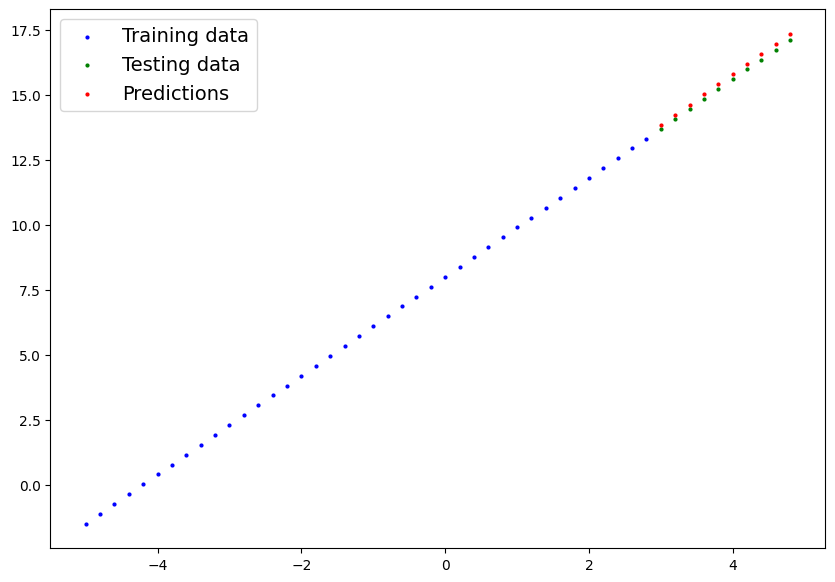

In [134]:
model_2.eval()

with torch.inference_mode():
  y_preds= model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

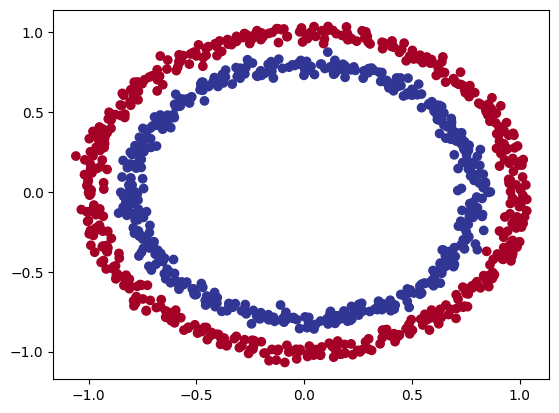

In [135]:
## Bringing that nonlinear part into it.
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples= 1000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [136]:
## Convert the data to tensors and train and test split.
import torch
from sklearn.model_selection import train_test_split

## Turn data into tensors.
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

# split into training and test sets.
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [137]:
## Build a model with non-linear activation functions.
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10, out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    ## where should we put our non-linear activation function.
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [138]:
model_3= CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [139]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_3.parameters(),
                          lr=0.15)

In [140]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

#3 put the data on the target device.
X_train, y_train= X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits= model_3(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval

  with torch.inference_mode():
    test_logits= model_3(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295 | Acc: 50.00% | Test Loss: 0.69316 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.69234 | Acc: 54.00% | Test Loss: 0.69241 | Test Acc: 51.50%
Epoch: 20 | Loss: 0.69209 | Acc: 70.38% | Test Loss: 0.69211 | Test Acc: 69.50%
Epoch: 30 | Loss: 0.69188 | Acc: 62.75% | Test Loss: 0.69185 | Test Acc: 65.00%
Epoch: 40 | Loss: 0.69167 | Acc: 54.12% | Test Loss: 0.69160 | Test Acc: 54.50%
Epoch: 50 | Loss: 0.69148 | Acc: 52.62% | Test Loss: 0.69138 | Test Acc: 52.50%
Epoch: 60 | Loss: 0.69128 | Acc: 52.75% | Test Loss: 0.69116 | Test Acc: 53.00%
Epoch: 70 | Loss: 0.69109 | Acc: 52.88% | Test Loss: 0.69094 | Test Acc: 53.00%
Epoch: 80 | Loss: 0.69090 | Acc: 53.12% | Test Loss: 0.69073 | Test Acc: 54.00%
Epoch: 90 | Loss: 0.69070 | Acc: 52.88% | Test Loss: 0.69050 | Test Acc: 54.50%
Epoch: 100 | Loss: 0.69050 | Acc: 52.88% | Test Loss: 0.69026 | Test Acc: 55.00%
Epoch: 110 | Loss: 0.69030 | Acc: 53.25% | Test Loss: 0.69001 | Test Acc: 55.00%
Epoch: 120 | Loss: 0.69008 | Acc: 52.75

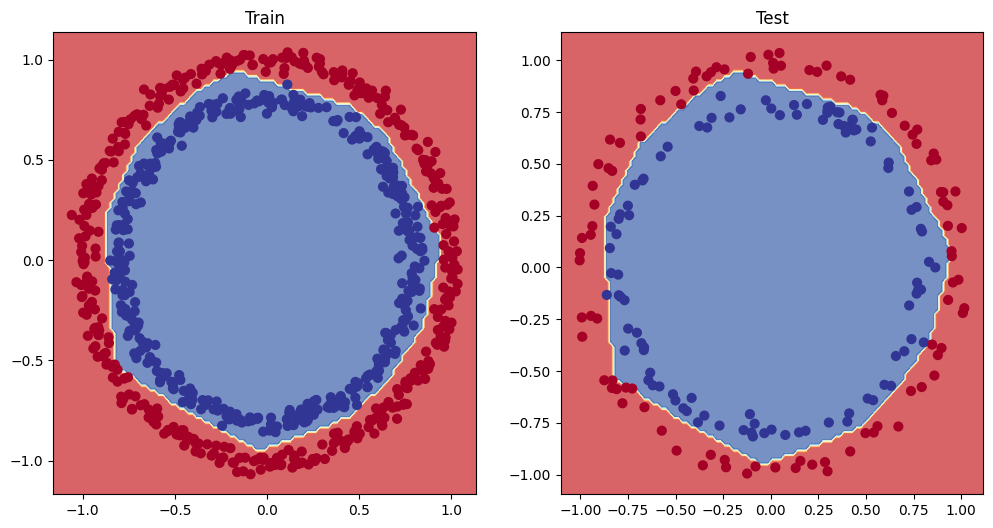

In [141]:
# plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## MultiClass Classification.

In [142]:
# Import
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [143]:
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

## CREATE MULTICLASS DATA
X_blob,y_blob= make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,
                          random_state=RANDOM_SEED)



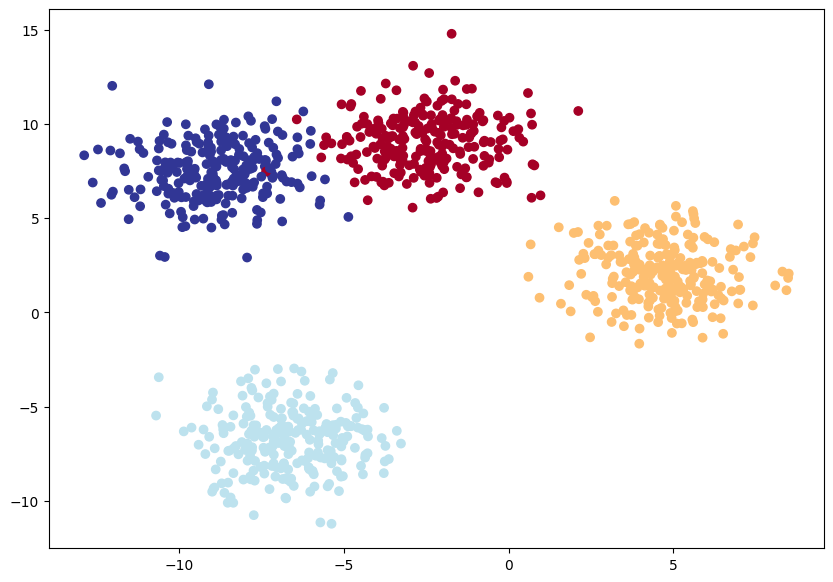

In [144]:
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test= train_test_split(X_blob,y_blob,test_size=0.2, random_state=RANDOM_SEED)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

## Building a multi-class classification model in PyTorch

In [153]:
## device agonostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [163]:
class MultiClassNonLinear(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=NUM_FEATURES, out_features=8)
    self.layer_2=nn.Linear(in_features=8, out_features=8)
    self.relu=nn.ReLU()
    self.layer_3=nn.Linear(in_features=8, out_features=NUM_CLASSES)

  def forward(self,x):
    # return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    z=self.layer_1(x)
    z=self.relu(z)
    z=self.layer_2(z)
    z=self.relu(z)
    z=self.layer_3(z)
    return z

In [164]:
class MultiClassLinear(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=NUM_FEATURES, out_features=8)
    self.layer_2=nn.Linear(in_features=8, out_features=8)
    self.layer_3=nn.Linear(in_features=8, out_features=NUM_CLASSES)
  def forward(self,x):
    z=self.layer_1(x)
    z=self.layer_2(z)
    z=self.layer_3(z)
    return z

In [165]:
model_4=MultiClassNonLinear().to(device)
model_4

MultiClassNonLinear(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (relu): ReLU()
  (layer_3): Linear(in_features=8, out_features=4, bias=True)
)

In [166]:
model_5=MultiClassLinear().to(device)
model_5

MultiClassLinear(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=4, bias=True)
)

In [167]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_4.parameters(),
                          lr=0.1)

In [168]:
with torch.inference_mode():
  y_preds=model_4(X_blob_train)
  y_preds
y_preds=torch.argmax(torch.softmax(y_preds, dim=1), dim=1)

In [169]:
print(y_preds)

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
        3, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [170]:
## Training
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000
X_blob_train, y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits= model_4(X_blob_train)
  y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss=loss_fn(y_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits= model_4(X_blob_test)
    test_pred=torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits, y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                  y_pred=test_pred)
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15883 | Acc: 40.38% | Test Loss: 1.07554 | Test Acc: 48.00%
Epoch: 10 | Loss: 0.64476 | Acc: 96.75% | Test Loss: 0.66069 | Test Acc: 97.50%
Epoch: 20 | Loss: 0.42535 | Acc: 98.50% | Test Loss: 0.43074 | Test Acc: 100.00%
Epoch: 30 | Loss: 0.25294 | Acc: 99.12% | Test Loss: 0.24508 | Test Acc: 99.50%
Epoch: 40 | Loss: 0.11232 | Acc: 99.25% | Test Loss: 0.10229 | Test Acc: 99.50%
Epoch: 50 | Loss: 0.06627 | Acc: 99.25% | Test Loss: 0.05848 | Test Acc: 99.50%
Epoch: 60 | Loss: 0.05068 | Acc: 99.25% | Test Loss: 0.04293 | Test Acc: 99.50%
Epoch: 70 | Loss: 0.04300 | Acc: 99.25% | Test Loss: 0.03491 | Test Acc: 99.50%
Epoch: 80 | Loss: 0.03836 | Acc: 99.25% | Test Loss: 0.02988 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.03525 | Acc: 99.25% | Test Loss: 0.02663 | Test Acc: 99.50%
Epoch: 100 | Loss: 0.03312 | Acc: 99.25% | Test Loss: 0.02433 | Test Acc: 99.50%
Epoch: 110 | Loss: 0.03160 | Acc: 99.25% | Test Loss: 0.02261 | Test Acc: 99.50%
Epoch: 120 | Loss: 0.03044 | Acc: 99.2

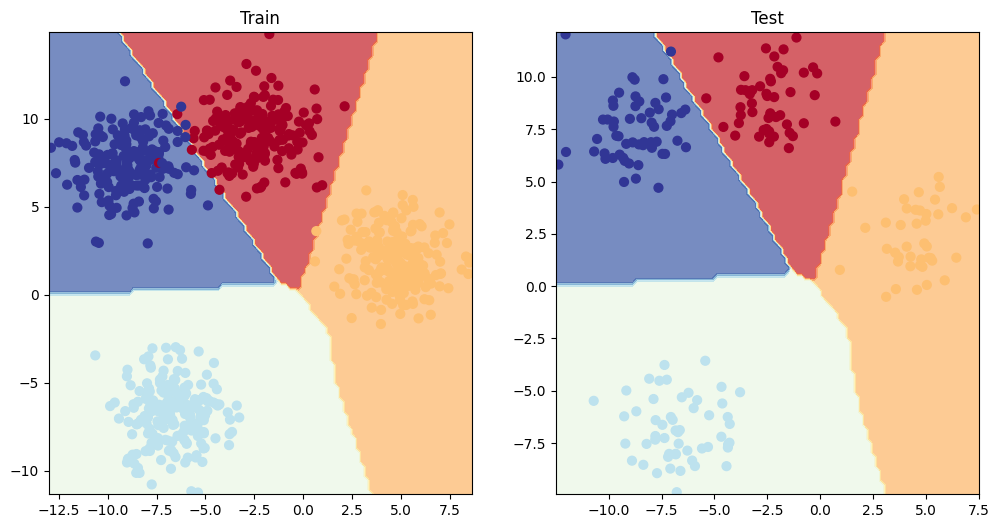

In [171]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [173]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_5.parameters(),
                          lr=0.1)

In [174]:
## Training
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000
X_blob_train, y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  model_5.train()

  y_logits= model_5(X_blob_train)
  y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss=loss_fn(y_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits= model_5(X_blob_test)
    test_pred=torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits, y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                  y_pred=test_pred)
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.92116 | Acc: 26.00% | Test Loss: 0.85459 | Test Acc: 55.00%
Epoch: 10 | Loss: 0.28521 | Acc: 97.12% | Test Loss: 0.23787 | Test Acc: 98.00%
Epoch: 20 | Loss: 0.11618 | Acc: 99.00% | Test Loss: 0.10434 | Test Acc: 98.50%
Epoch: 30 | Loss: 0.07650 | Acc: 99.00% | Test Loss: 0.06791 | Test Acc: 98.50%
Epoch: 40 | Loss: 0.06006 | Acc: 99.00% | Test Loss: 0.05209 | Test Acc: 99.00%
Epoch: 50 | Loss: 0.05133 | Acc: 99.00% | Test Loss: 0.04346 | Test Acc: 99.00%
Epoch: 60 | Loss: 0.04599 | Acc: 99.00% | Test Loss: 0.03807 | Test Acc: 99.50%
Epoch: 70 | Loss: 0.04242 | Acc: 99.00% | Test Loss: 0.03440 | Test Acc: 99.50%
Epoch: 80 | Loss: 0.03989 | Acc: 99.00% | Test Loss: 0.03174 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.03800 | Acc: 99.00% | Test Loss: 0.02972 | Test Acc: 99.50%
Epoch: 100 | Loss: 0.03655 | Acc: 99.00% | Test Loss: 0.02813 | Test Acc: 99.50%
Epoch: 110 | Loss: 0.03541 | Acc: 99.00% | Test Loss: 0.02686 | Test Acc: 99.50%
Epoch: 120 | Loss: 0.03449 | Acc: 99.00

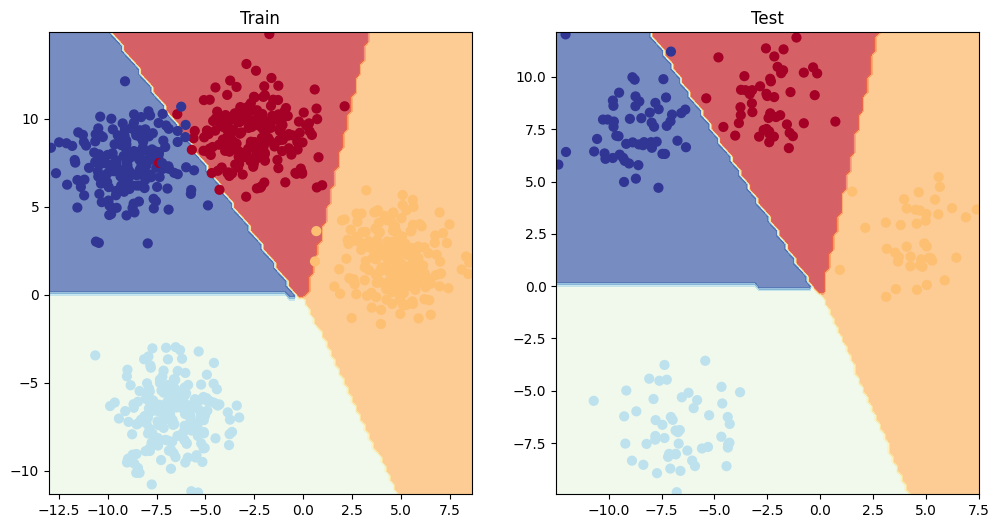

In [175]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

In [176]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [181]:
model_5.eval()
with torch.inference_mode():
  y_preds=torch.softmax(model_5(X_blob_test), dim=1).argmax(dim=1)


In [183]:
from torchmetrics import Accuracy
torchmetric_accuracy=Accuracy(task='multiclass',num_classes=4).to(device)

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950)